In [6]:
import numpy as np
import pandas as pd
import math

In [7]:
def calc_entropy(x):
    counts = np.bincount(x)
    probabilities  = counts / len(x)
    entropy = 0
    for prob in probabilities:
        if prob > 0:
            entropy += prob * math.log(prob,2)
    return -entropy

In [8]:
def calc_information_gain(data, split_name, target_name):
    original_entropy = calc_entropy(data[target_name])

    values = data[split_name].unique()

    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]

    entropy = 0

    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        entropy += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - entropy
    

# XAI 기법

In [9]:
from pdpbox import info_plots

pima_data = dataset
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

# pdpbox를 이용해 GTT(pima data의 피처 중 하나) 피처에 대한 목표 플롯을 그리는 코드
fig, axes, summary_df = info_plots.target_plot(
	df=pima_data,
	feature = 'Glucose',
	target = pima_target
)

# GTT 데이터에 대한 모델의 실제 예측 분포 플롯을 그리는 코드
fig, axes, summary_df = info_plots.actual_plot(
	model = model,
	X=pima_data[pima_features],
	feature = 'Glucose',
	feature_name = 'Glucose',
	predict_kwds={}
)

# GTT 테스트 피처에 대해 부분 의존성을 계산하고 플롯을 그리는 코드
pdp_gc = pdp.pdp_isolate(
	model = model,
	dataset = pima_data,
	model_features = pima_features,
	feature='Glucose'
)

#플롯 정보 설정
fig, axes = pdp.pdp_plot(
	pdp_gc,
	'Glucose',
	plot_lines=False,
	frac_to_plot=0.5,
	plot_pts_dist=True
)


#################################################################

#혈압과 GTT 테스트 데이터 두 피처에 대해 목표 플롯을 그리는 코드
fig, axes, summary_df = info_plots.target_plot_interact(
	df = pima_data,
	features = ['BloodPressure', 'Glucose'],
	feature_names = ['BloodPressure', 'Glucose'],
	target = pima_target
)

# 혈압과 GTT 테스트 데이터로 모델에 대한 부분 의존성을 계산하고 플롯을 그리는 코드
pdp_interaction = pdp.pdp_interact(
	model = model,
	dataset = pima_data,
	model_features = pima_features,
	features = ['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
	pdp_interaction_out=pdp_interaction,
	feature_names = ['BloodPressure', 'Glucose'],
	plot_type='contour', #등고선 방식. 'grid': 그리드 차트
	x_quantile=True,
	plot_pdp=True
)

ModuleNotFoundError: No module named 'pdpbox'

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

a value:  -32.39552264560754
b value:  [8.76050748]
MEDV =  8.76 * RM -32.40
RMSE : 2.526487
[14:21:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 3.006564


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


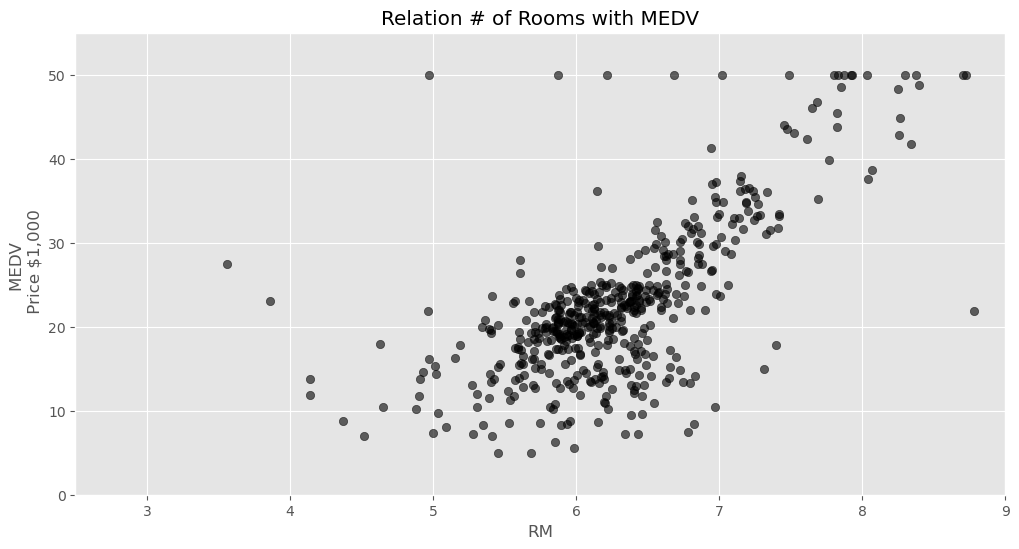

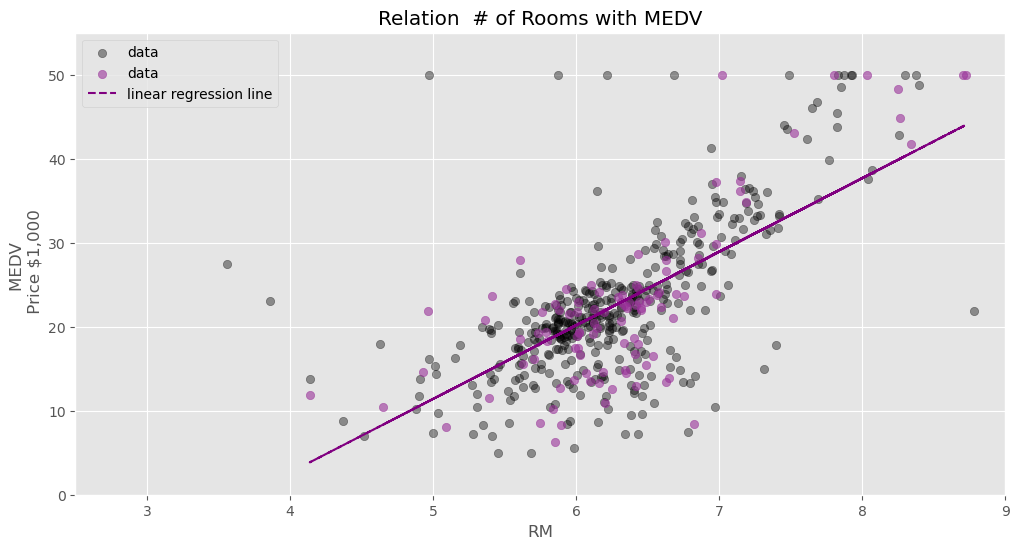

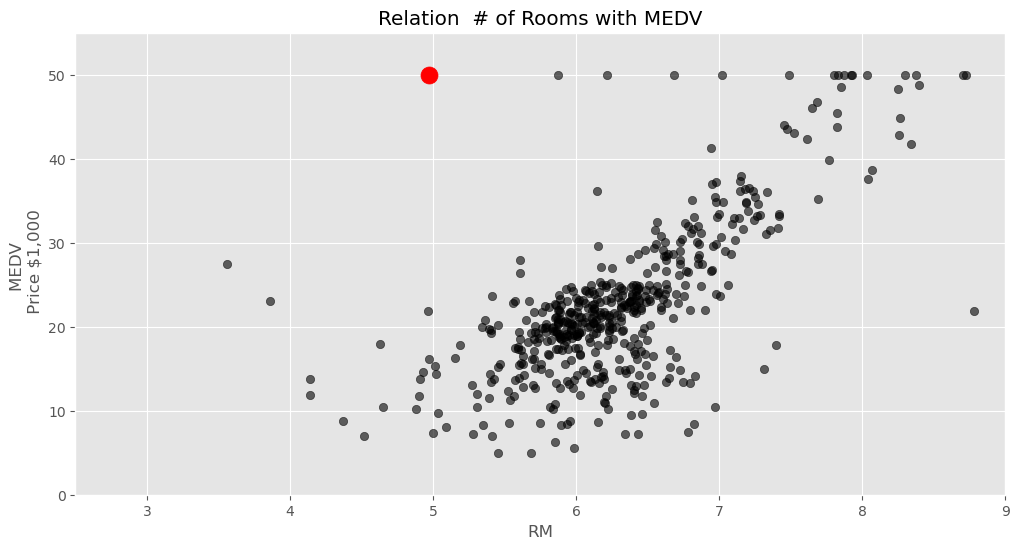

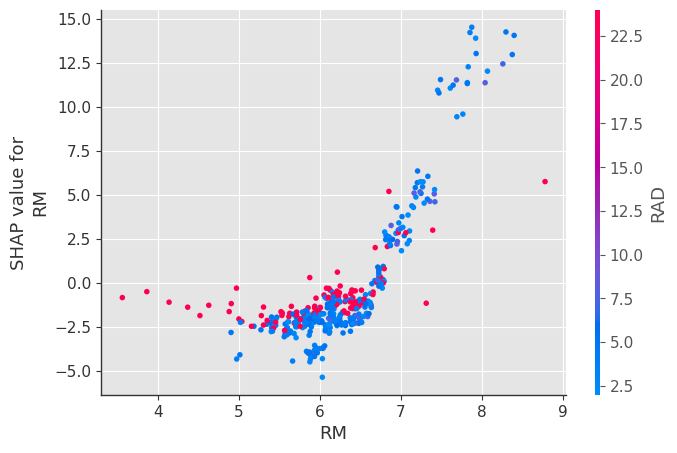

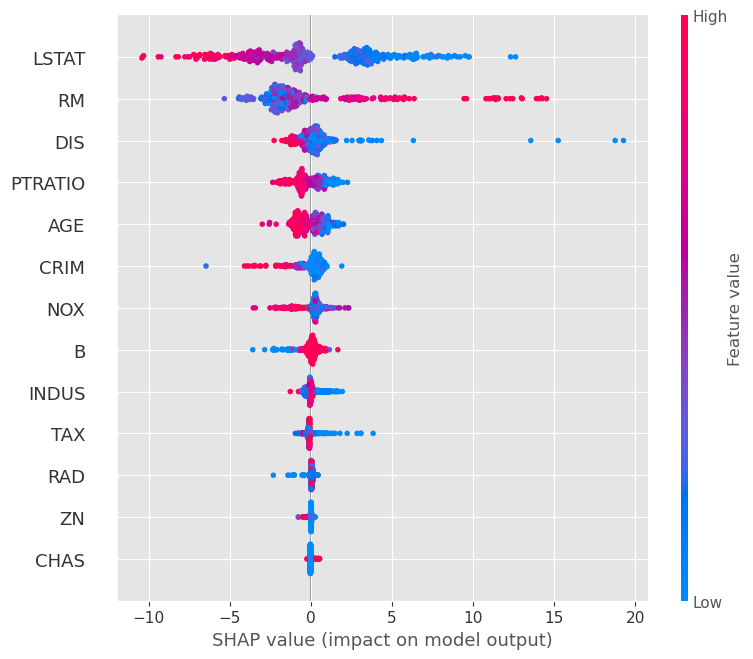

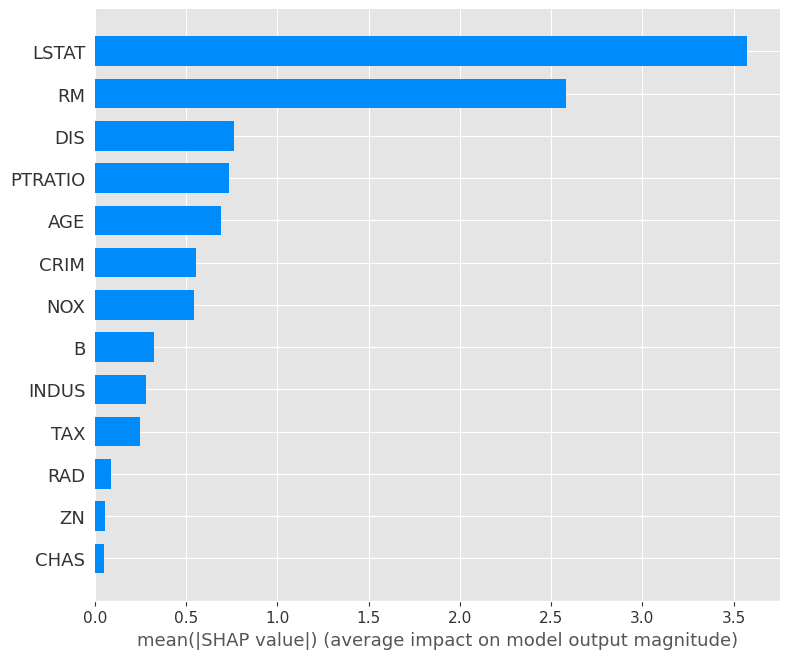

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

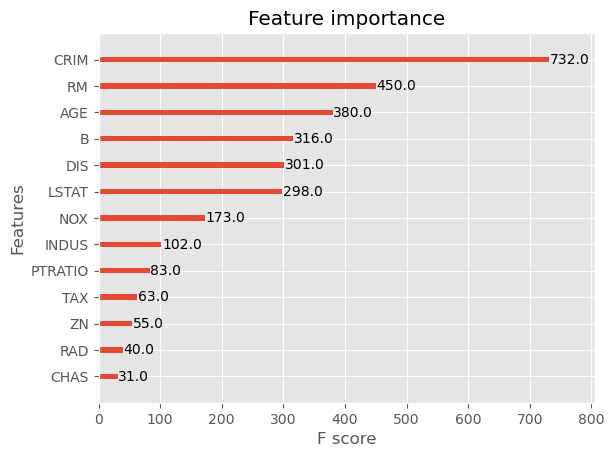

In [10]:
import shap
from sklearn.model_selection import train_test_split



#학습, 테스트 데이터셋 분리
X, y = shap.datasets.boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



#산점도 출력
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline

matplotlib.style.use('ggplot')

fig, ax1 = plt.subplots(1, 1, figsize = (12, 6))

ax1.scatter(X['RM'], y, color='black', alpha=0.6)

ax1.set_title('Relation # of Rooms with MEDV')
ax1. set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')



# 선형 모델로 방 개수와 주택 가격의 관계 구하기
from sklearn import linear_model
import pandas as pd

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X_train['RM']), y=y_train)
prediction = linear_regression.predict(X=pd.DataFrame(X_test['RM']))

print('a value: ', linear_regression.intercept_)
print('b value: ', linear_regression.coef_)
print('MEDV = {: .2f} * RM {: .2f}'.format(linear_regression.coef_[0],
                                          linear_regression.intercept_))



#방 개수가 달라질 때 주택 매매 가격 예측 그래프+직선의 방정식
fig, ax1 = plt.subplots(1, 1, figsize =(12, 6))

ax1.scatter(X_train['RM'], y_train, color='black',
           alpha=0.4, label='data')
ax1.scatter(X_test['RM'], y_test, color='#993299',
           alpha=0.6, label='data')

ax1.set_title('Relation  # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')

ax1.plot(X_test['RM'], prediction, color='purple', alpha=1, linestyle='--', label='linear regression line')
ax1.legend()



#모델 예측치와 실제 집값 간의 RMSE 구하는 코드
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, prediction, squared = False))

print("RMSE : %f" % (rmse))



# xgboost의 선형 회귀 모델로 주택 매매 가격을 예측하는 모델을 만들고 학습
import xgboost

model = xgboost.XGBRegressor(objective='reg:linear')
model.fit(X_train, y_train)

preds = model.predict(X_test)



# 전체 feature를 사용해서 학습시킨 모델의 RMSE를 구하는 코드
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE : %f" % (rmse))



#SHAP의 설명체를 정의 섀플리 값 계산 로직
shap.initjs()

#SHAP 값으로 모델의 예측을 설명
# 설명체는 LightGBM, CatBoost, scikit-learn 모델을 입력 가능
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

#첫번쨰 데이터에 대한 구체적 shap 값 시각화
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :])



#259번 데이터에 대해서 방의 개수와 집 가격이 어떤 관계가 있는지 플롯
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
idx = 259
ax1. scatter(X['RM'], y, color='black', alpha=0.6)
ax1.scatter(X_train['RM'].iloc[idx], y_train[idx], c='red', s=150)
ax1.set_title('Relation  # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')



# 데이터 259에 대한 섀플리 영향도를 그림
shap.force_plot(explainer.expected_value, shap_values[259, :], X_train.iloc[259, :])



# 전체 데이터에 대한 섀플리 영향도를 그림
shap.force_plot(explainer.expected_value, shap_values, X_train)



#하나의 피처가 전체 예측에 미치는 영향력을 SHAP로 계산하고 출력하는 코드
shap.dependence_plot("RM", shap_values, X_train)

# 모든 피처에 대해 SHAP 값을 계산하고 영향력을 시각화 하는 코드
shap.summary_plot(shap_values, X_train)
shap.summary_plot(shap_values, X_train, plot_type='bar')
xgboost.plot_importance(model)


# xgboost

In [14]:
from xgboost import XGBClassifier
from sklearn import metrics 
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

